

```
# This is formatted as code
```

# Linear Regression

**Question 1**

Derive the linear regression

4.065692318299849 2.2634176028710415


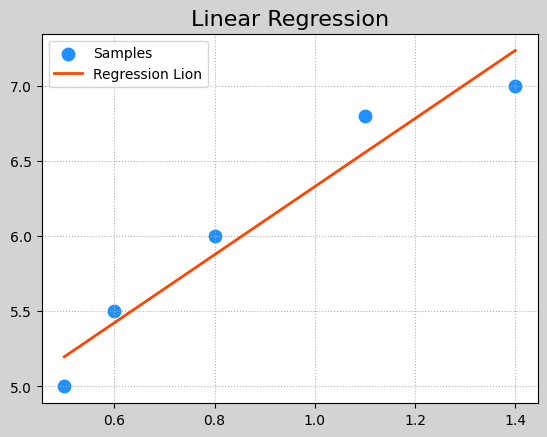

In [7]:
import numpy as np
import matplotlib.pyplot as mp

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

# 基于梯度下降理论 找到最优w0与w1 使得loss取最小值
w0 = 1
w1 = 1
times = 1000
lrate = 0.01
for i in range(times):
    # 通过偏导公式求两方向上的偏导数
    d0 = (w0 + w1 * train_x - train_y).sum()
    d1 = (train_x * (w0 + w1 * train_x - train_y)).sum()
    # 更新w0与w1
    w0 = w0 - lrate * d0
    w1 = w1 - lrate * d1
print(w0, w1)

# 画图
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=16)
mp.grid(linestyle=':')
mp.scatter(train_x, train_y, s=80, color='dodgerblue', label='Samples')
pred_y = w1 * train_x + w0
mp.plot(train_x, pred_y, linewidth=2, color='orangered', label='Regression Lion')
mp.legend()
mp.show()

Iteration = 1, Loss = 29.828035310373195
Iteration = 101, Loss = 0.879227572573218
Iteration = 201, Loss = 0.13948105104338654
Iteration = 301, Loss = 0.1113956951387524
Iteration = 401, Loss = 0.10230468147431657
Iteration = 501, Loss = 0.09464168560872445
Iteration = 601, Loss = 0.08785672649869541
Iteration = 701, Loss = 0.08184056915906128
Iteration = 801, Loss = 0.07650588325404703
Iteration = 901, Loss = 0.07177547062109971


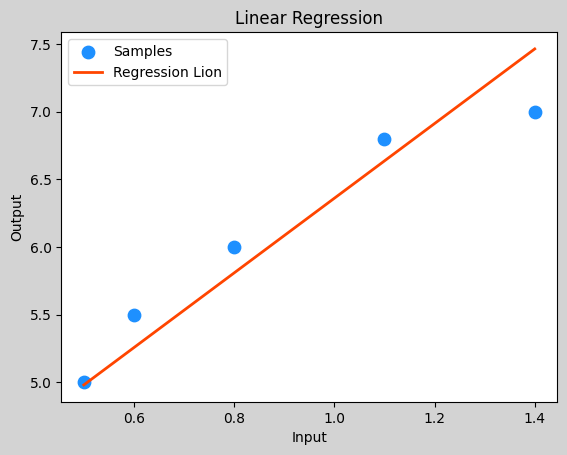

In [11]:
import numpy as np
np.random.randn(2,3).shape
np.arange(10)

# https://github.com/2951121599/ML/blob/master/02_%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/demo01_%E7%94%A8numpy%E5%AE%9E%E7%8E%B0%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.py
# https://www.geeksforgeeks.org/ml-linear-regression/

W0 = 'theta0'
W1 = 'theta1'

# y = theta0 + theta1*x

class LinearRegressionV1(object):
  def __init__(self):
    self.parameters = {}
    # Initialize random parameters
    self.parameters[W0] = np.random.uniform(0, 1)
    self.parameters[W1] = np.random.uniform(0, 1)

  def forward_propagation(self, train_input):
    w0 = self.parameters[W0]
    w1 = self.parameters[W1]
    prediction = w0 + w1*train_input
    return prediction

  def cost_function(self, prediction, train_output):
    cost = np.mean((prediction - train_output)**2) # mean square
    return cost

  def back_propagation(self, train_input, train_output, prediction):
    derivatives = {}
    derivatives[W0] = np.mean(prediction - train_output)
    derivatives[W1] = np.mean((prediction - train_output) * train_input)
    return derivatives

  def update(self, derivatives, lrate):
    self.parameters[W0] = self.parameters[W0] - lrate*derivatives[W0]
    self.parameters[W1] = self.parameters[W1] - lrate*derivatives[W1]

  def train(self, train_input, train_output, times = 1000, lrate = 0.01):
    self.loss = []
    for i in range(times):
      predictions = self.forward_propagation(train_input)
      cost = self.cost_function(predictions, train_output)
      self.loss.append(cost)
      derivatives = self.back_propagation(train_input, train_output, predictions)
      self.update(derivatives, lrate)
      if i % 100 == 0:
        print("Iteration = {}, Loss = {}".format(i + 1, cost))

  def plot(self,train_x, train_y):
    import matplotlib.pyplot as plt
    plt.figure('Linear Regression', facecolor='lightgray')
    plt.title('Linear Regression', fontsize=16)


    plt.scatter(train_x, train_y, s=80, color='dodgerblue', label='Samples')


    w0 = self.parameters[W0]
    w1 = self.parameters[W1]
    pred_y = w1 * train_x + w0
    plt.plot(train_x, pred_y, linewidth=2, color='orangered', label='Regression Lion')

    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()


train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

linear_regression = LinearRegressionV1()
linear_regression.train(train_x, train_y)

linear_regression.plot(train_x, train_y)












**Answer the following questions:**

**1)What is the activation function that you will choose for the output layer Justify your answer briefly.**

**Solution:** Linear activation function(Identity activation function) for regression problems.

2. How many neurons should there be in the output layer? Why?

**Solution:** 1 neuron for regression problems.

3. Report the average MSE loss and the accuracy.

**Solution:** MSE loss: 0.000016 of sigmoid activation fuction.

4. Plot the loss and accuracy as a function of the number of iterations.

**Solution:** Please check the figure above

5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
**Solution:** Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradien. As we change the rate, we can see when rate=0.001, the loss is the minum with 0.000016. If the learning rate is smaller, we need to train more time to get the better results. If the learning rate is large, it is hard to learn a good model as the weights always jump.

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

**Solution:** a) we do not need to update the rule, due to the rule formula, the number of neurals just affects the Weights
b) The number of neurons will affect the results, but we can not increase the number all the time, more neurons may lead to overfitting, it may lead to the loss to be Nan, which make the neural network worse. Exploding Gradient Problem could be seen if the number is 9,10, is caused by continually multiplying gradients through network layers with values greater than 1.0. Instead We can increase the layers to get better results.

7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

**Solution:** a)Yes, we need to update the rule regarding different activation functions.  b)We need to change the forward function, the backpogation process, the update rule, for the network, we do not need to change the output layer.
c) Sigmoid loss: 0.000016, tanh loss:0.000098, we can see the results is better when use sigmoid as activation function for hidden layer.
